Consumer Financial Protection Bureau

About the database
*   The Consumer Complaint Database is a collection of complaints about consumer financial products and services that they sent to companies for response. 
*   The mission is to protect, promote, and preserve the financial well-being of the American
consumer.
*   Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first.
*   97% of complaints sent to companies get timely responses
*   84% sent through CFPB website, 7% sent from phone calls. The rest were sent from mail, email, and fax. 
*   The database generally updates daily.

How we use complaint data
*  Complaint volume should be considered in the context of company size and/or market share. For example, companies with more customers may have more complaints than companies with fewer customers. Need additional context to explain the dataset.
*  insights into problems people are experiencing in the marketplace and help us regulate consumer financial products and services under existing federal consumer financial laws, enforce those laws judiciously, and educate and empower consumers to make informed financial decisions







Database Link: https://www.consumerfinance.gov/data-research/consumer-complaints/ 

# Loading Data In

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Classes/2 Practicum/complaints.csv")

#from google.colab import files
#df = files.upload()

#Data Description

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import defaultdict

In [ ]:
df.shape
#uncleaned full dataset

(1939164, 18)

In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

## Variables and Descriptives

In [ ]:
df[0:5]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2021-01-13,Debt collection,I do not know,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,NaN,NaN,OneMain Finance Corporation,FL,33433,NaN,NaN,Web,2021-01-13,In progress,Yes,NaN,4065676
1,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
2,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,Pioneer has committed several federal violatio...,NaN,Pioneer Capital Solutions Inc,CA,925XX,NaN,Consent provided,Web,2019-09-15,Closed with explanation,Yes,NaN,3374555


In [ ]:
df[['Issue','Sub-issue','Submitted via','Company', 'Product','Sub-product','State','Company response to consumer','Company public response']].describe()

,Issue,Sub-issue,Submitted via,Company,Product,Sub-product,State,Company response to consumer,Company public response
count,1939164,1342149,1939164,1939164,1939164,1703999,1903286,1939162,810877
unique,165,219,6,5882,18,76,63,8,11
top,Incorrect information on your report,Information belongs to someone else,Web,"EQUIFAX, INC.","Credit reporting, credit repair services, or o...",Credit reporting,CA,Closed with explanation,Company has responded to the consumer and the ...
freq,406362,251514,1520495,227569,623496,615419,255202,1566629,643002


In [ ]:
#Basic data cleaning -- refer to the shared dataset for a more comprehensive data cleaning effort, especially for consumer_complaint_narratives

import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt 
#col = ['Product', 'Consumer complaint narrative']
#df = df[col]
#remove missing values in Consumer complaint narrative
df = df[pd.notnull(df['Consumer complaint narrative'])]
df=df.rename(columns={'Consumer complaint narrative': 'Consumer_complaint_narrative'})
#print(df.columns)
#df.columns = ['Product', 'Consumer_complaint_narrative']
#add a column to encode the product as integer
df['category_id'] = df['Product'].factorize()[0]
#drop duplicates
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
#print(category_to_id)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
#print(df.head())

In [ ]:
df[['Issue','Sub-issue','Submitted via','Company', 'Product','Sub-product','State','Company response to consumer','Company public response']].describe()

,Issue,Sub-issue,Submitted via,Company,Product,Sub-product,State,Company response to consumer,Company public response
count,658331,510070,658331,658331,658331,606159,654796,658330,328933
unique,160,216,1,4783,18,75,63,6,11
top,Incorrect information on your report,Information belongs to someone else,Web,"EQUIFAX, INC.","Credit reporting, credit repair services, or o...",Credit reporting,CA,Closed with explanation,Company has responded to the consumer and the ...
freq,135879,68073,658331,75776,237356,232876,86729,544881,252382


## Exploring Bivariate Relationships

### With Product

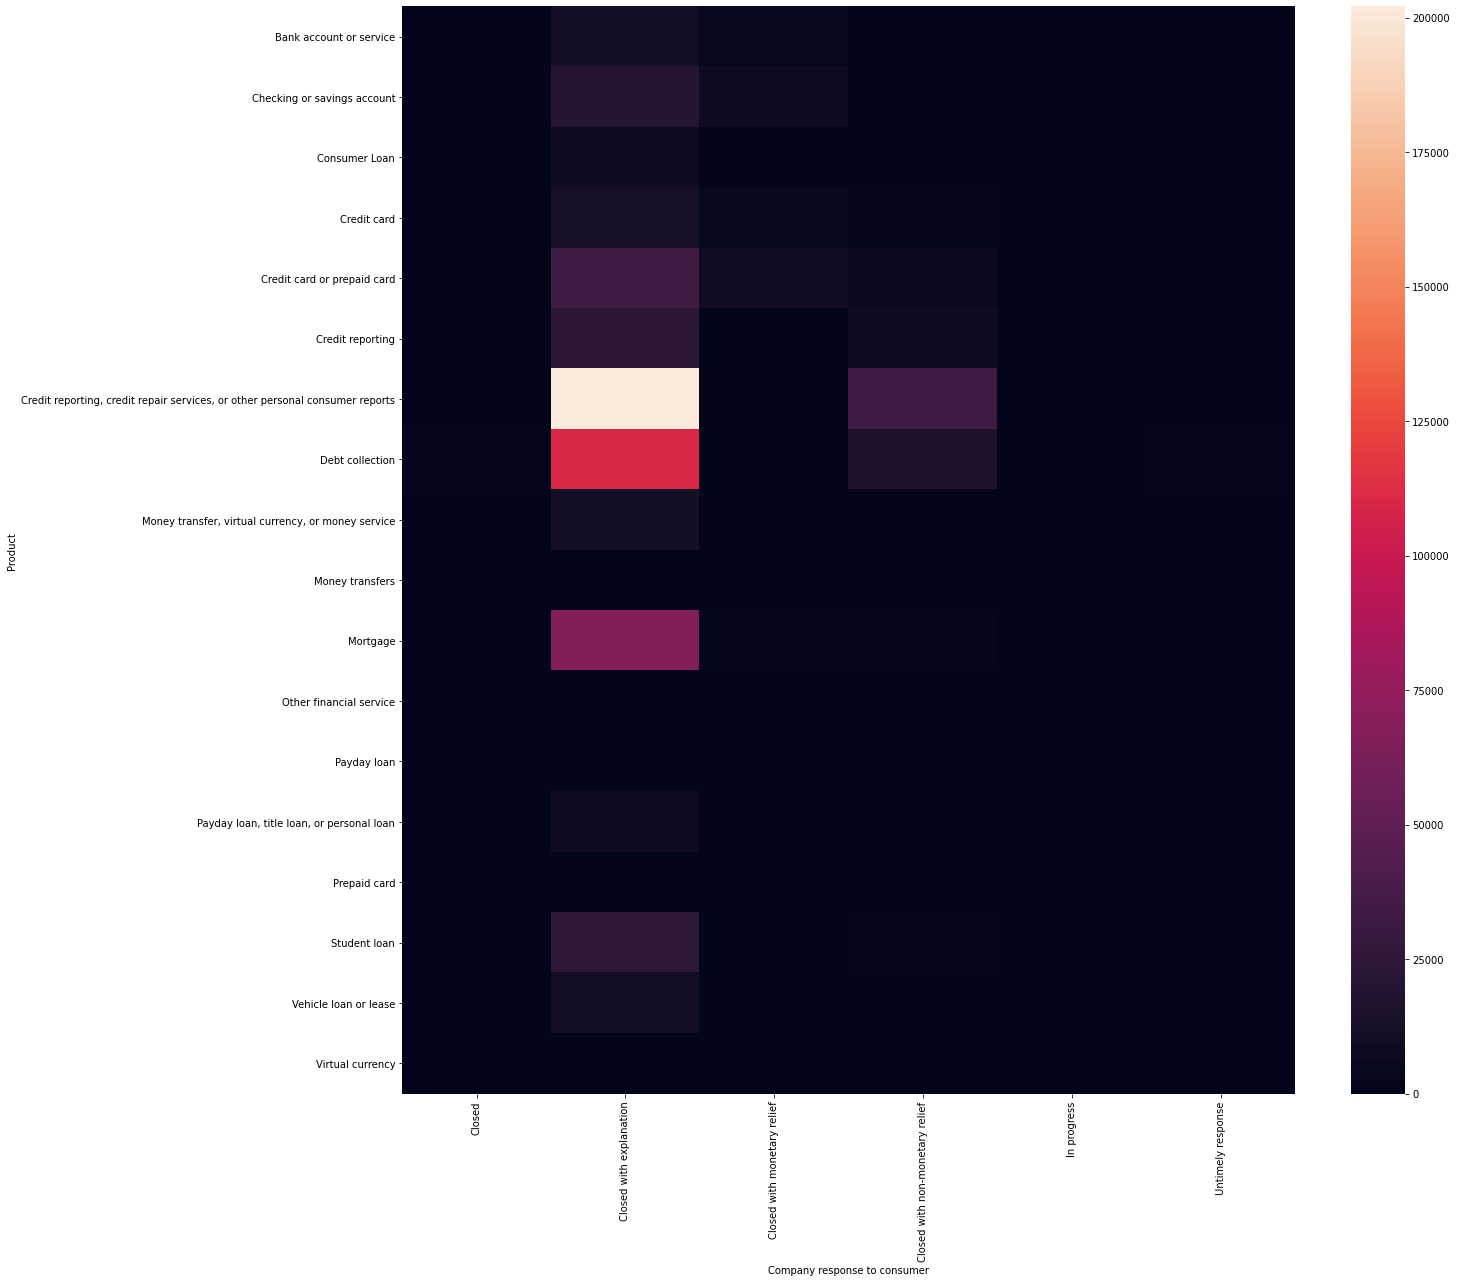

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(pd.crosstab(df['Product'], df['Company response to consumer']), ax = ax)

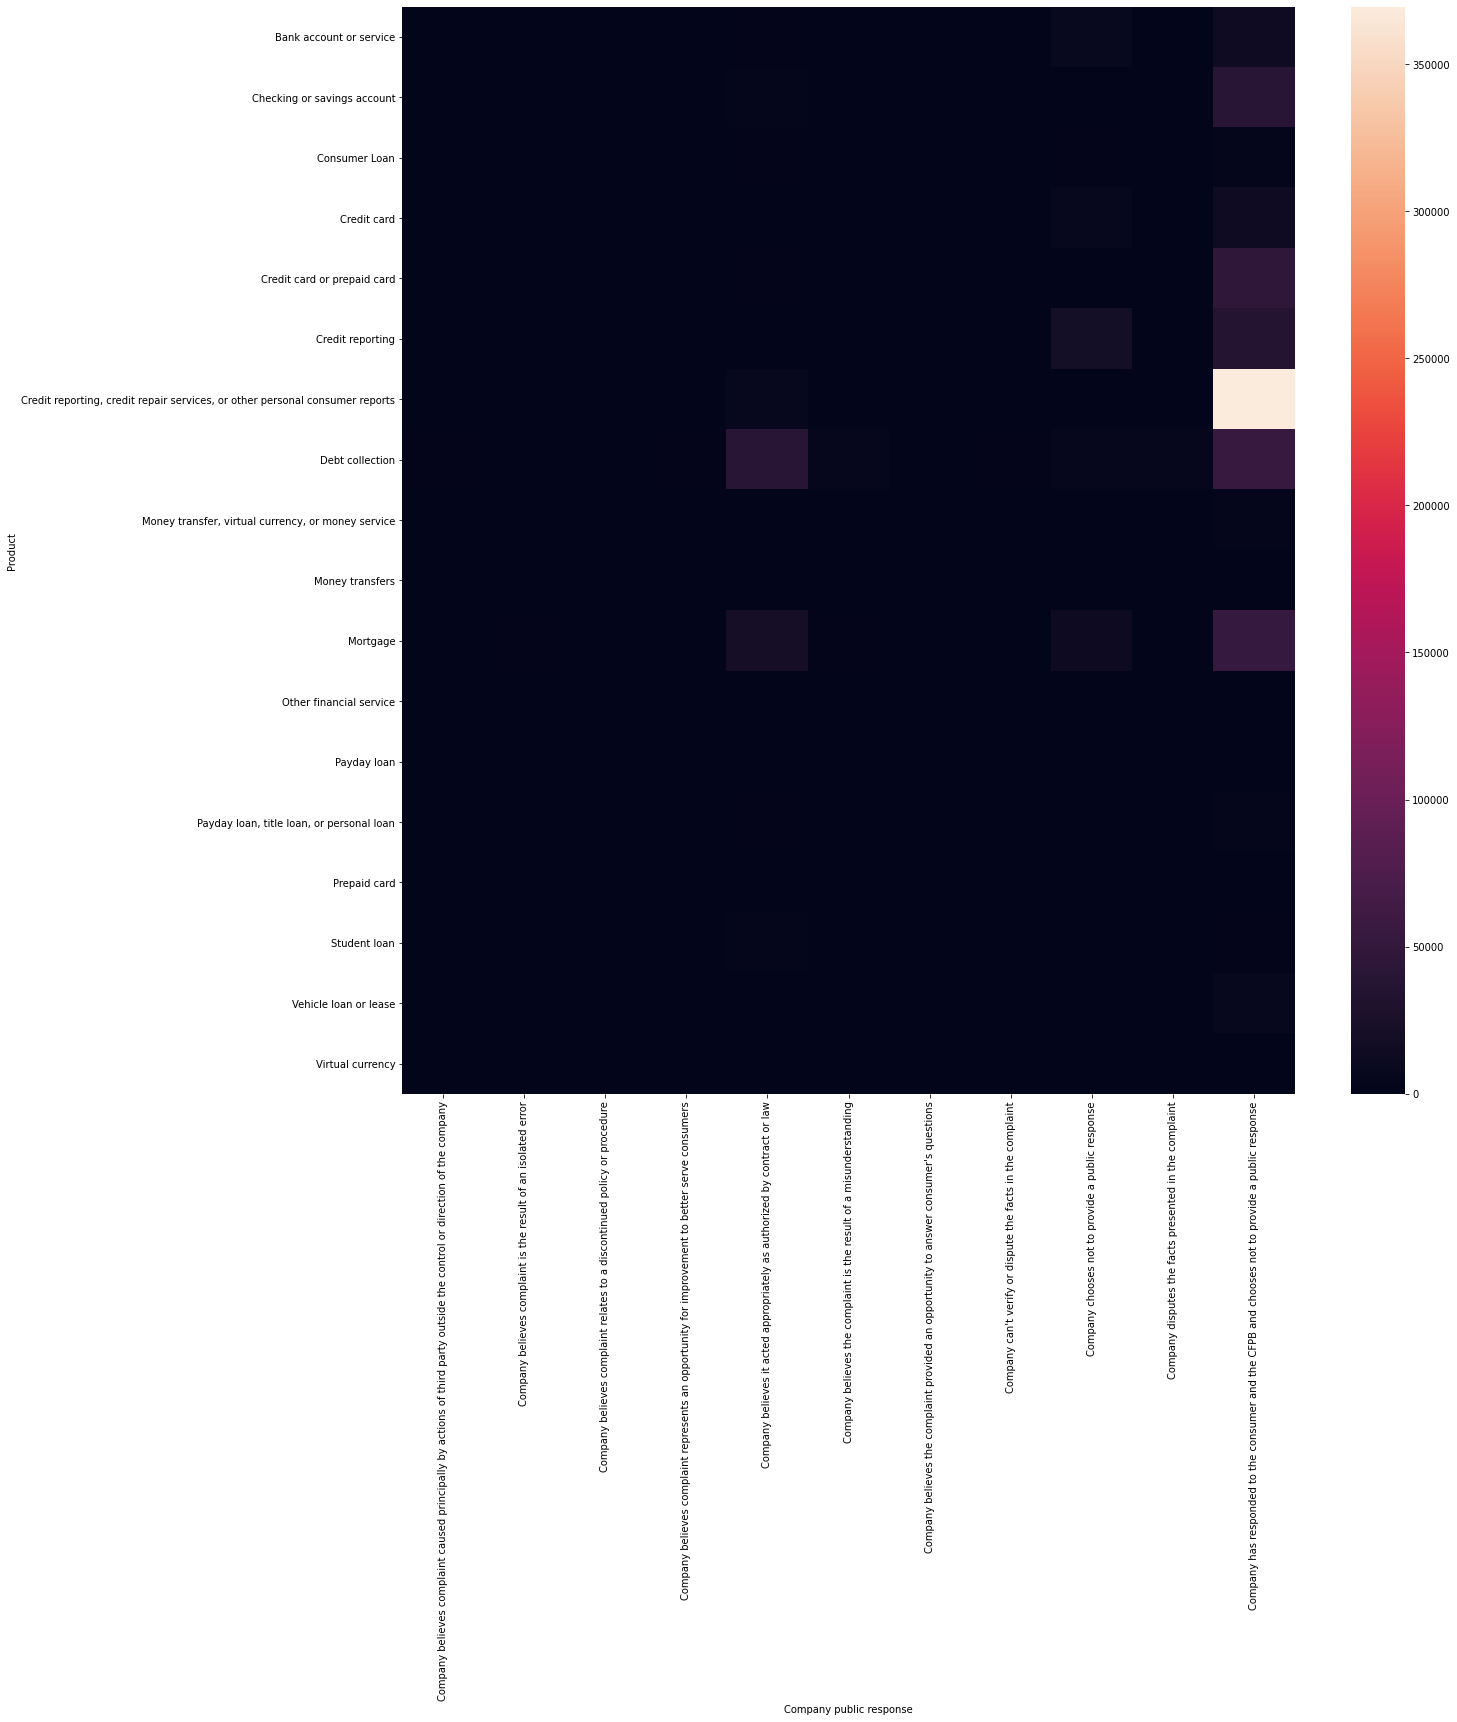

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(pd.crosstab(df['Product'], df['Company public response']), ax = ax)

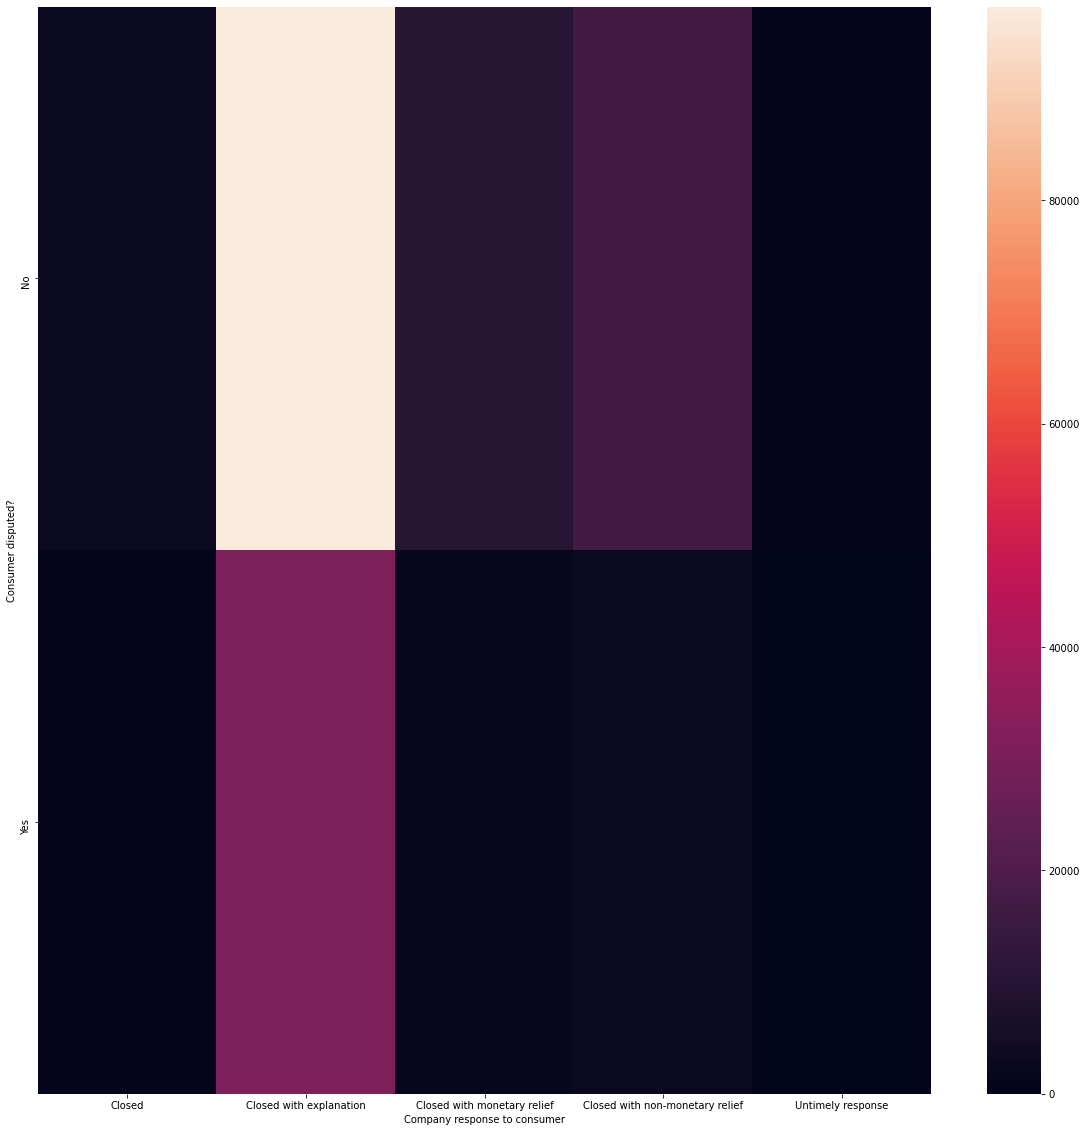

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(pd.crosstab(df['Consumer disputed?'], df['Company response to consumer']), ax = ax)

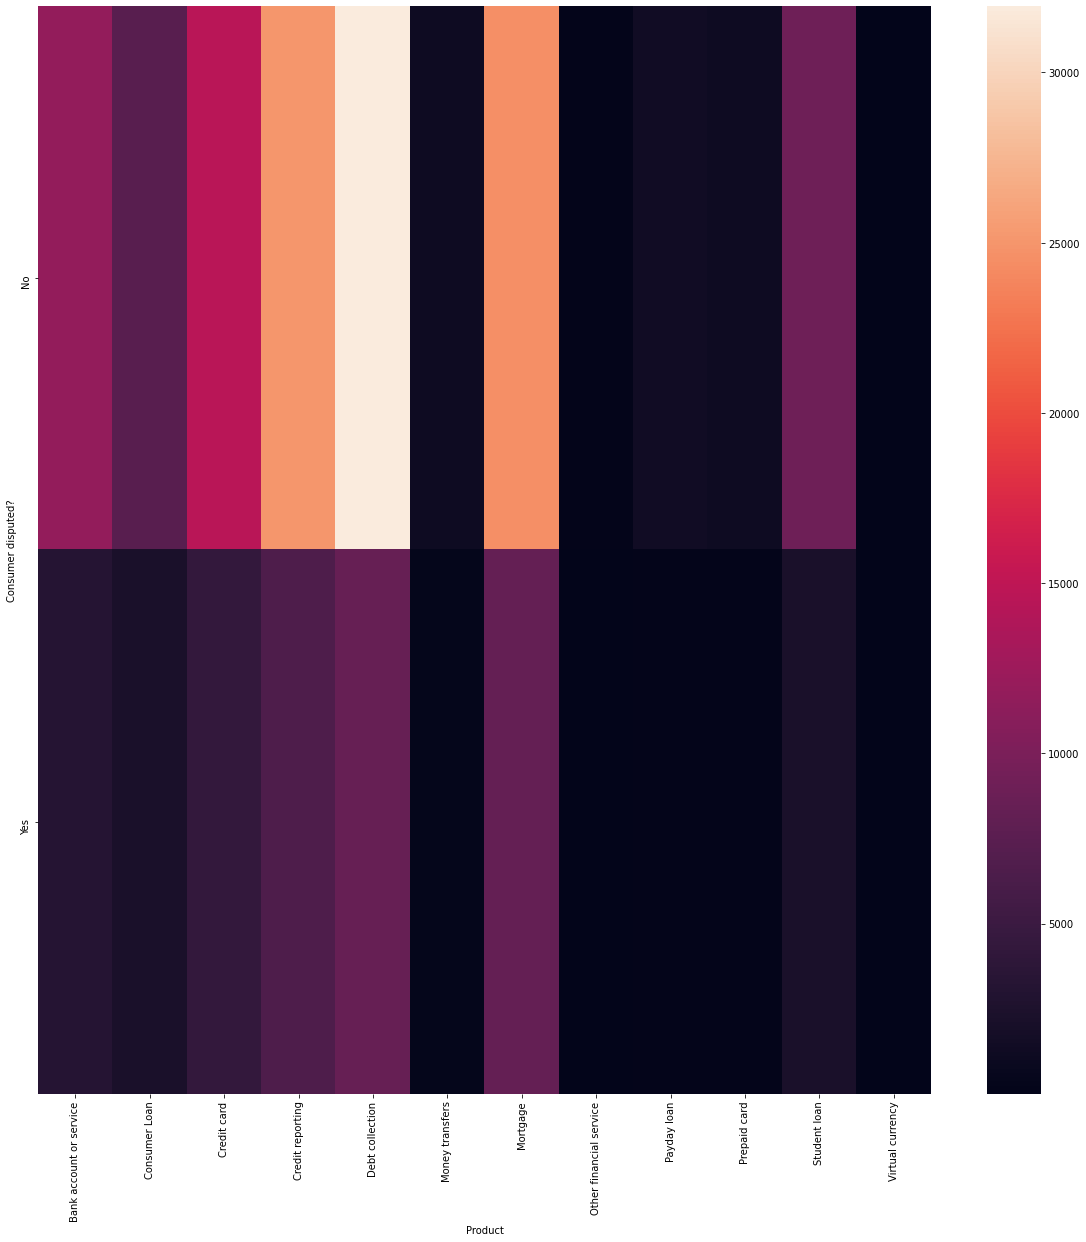

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(pd.crosstab(df['Consumer disputed?'], df['Product']), ax = ax)

In [ ]:
df['Consumer disputed?'].value_counts()

No     128259
Yes     35807
Name: Consumer disputed?, dtype: int64

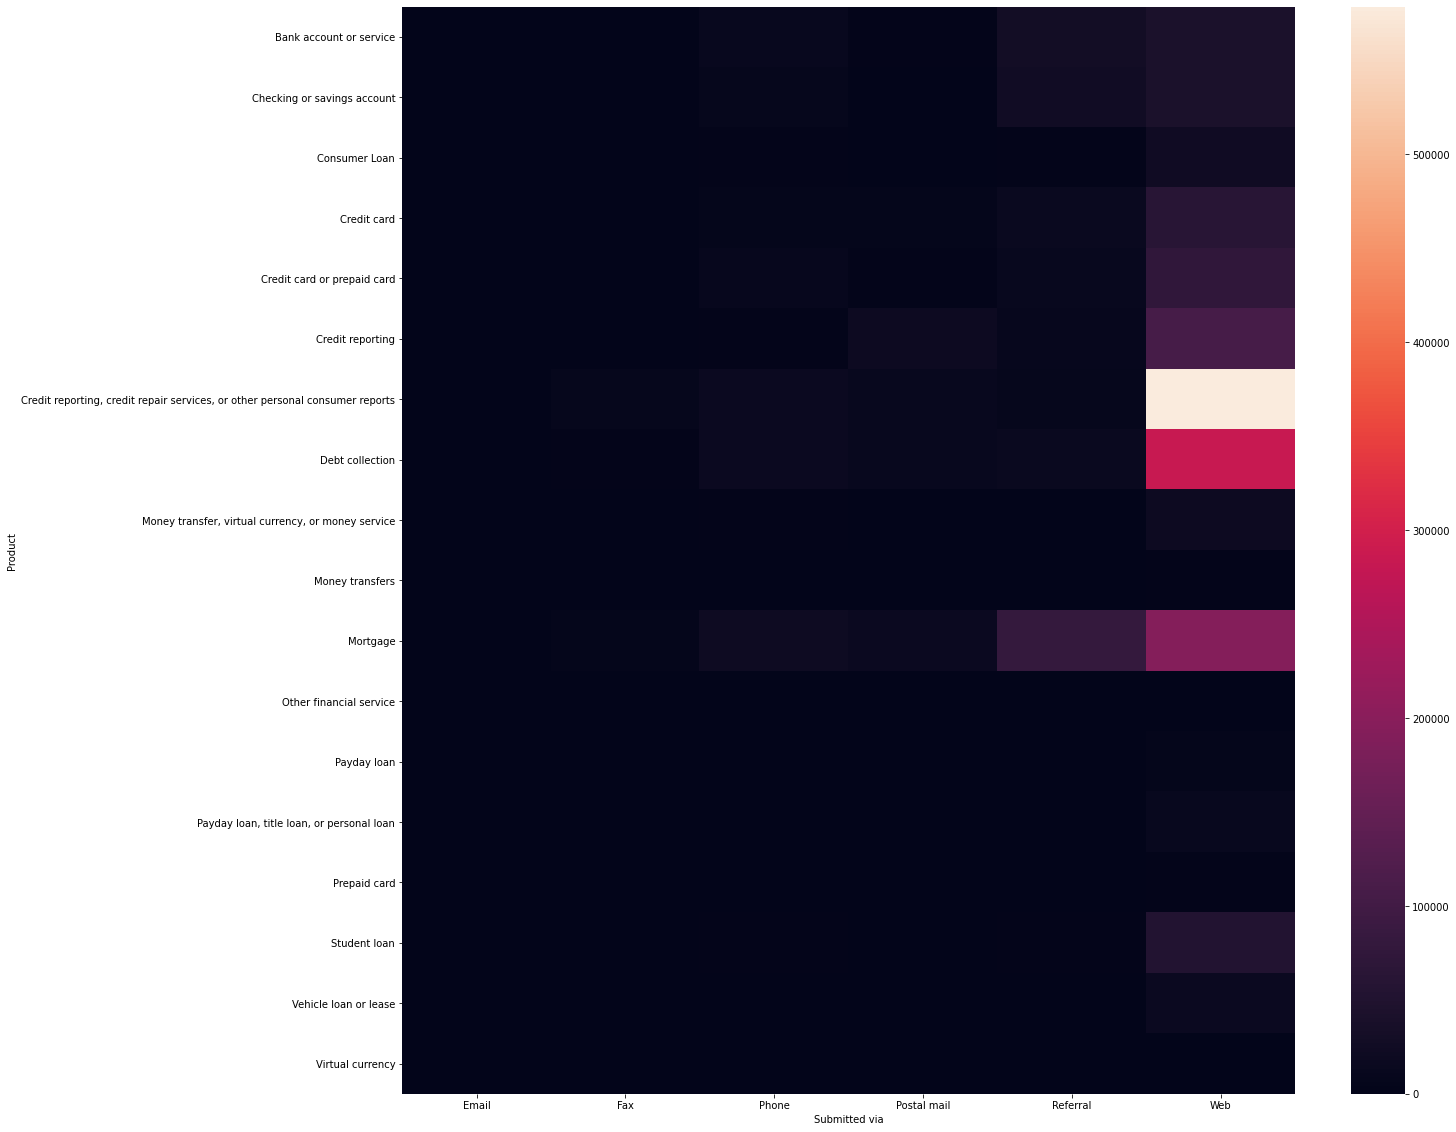

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(pd.crosstab(df['Product'], df['Submitted via']), ax = ax)

### With Complaint Narratives

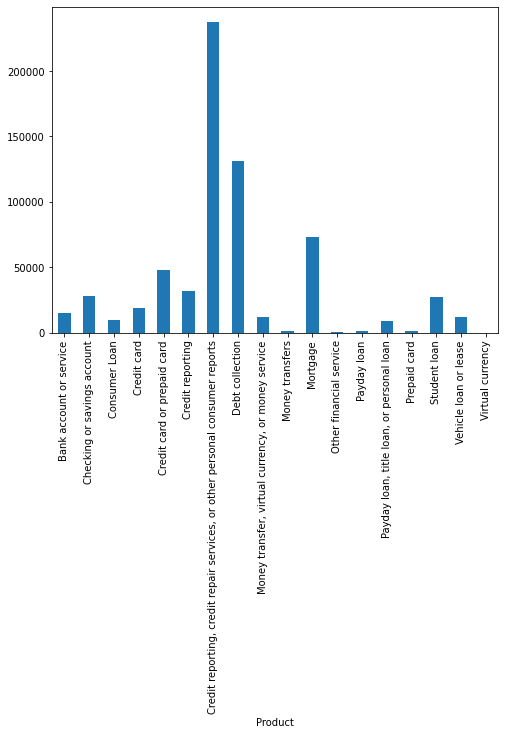

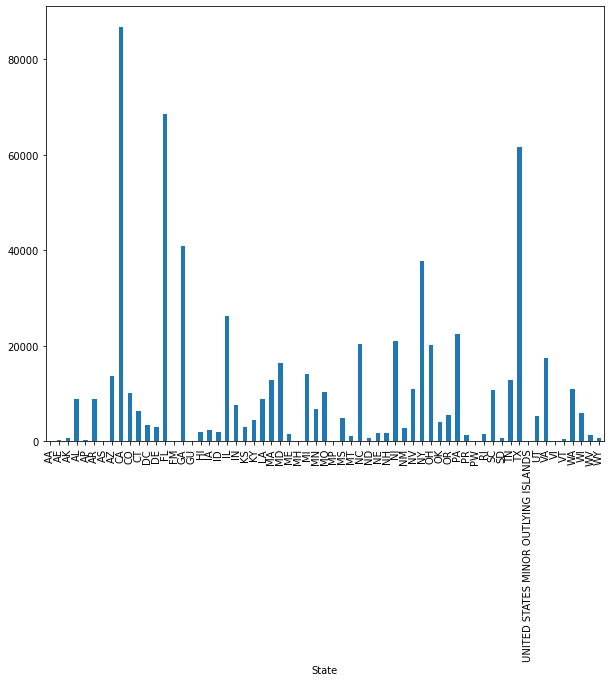

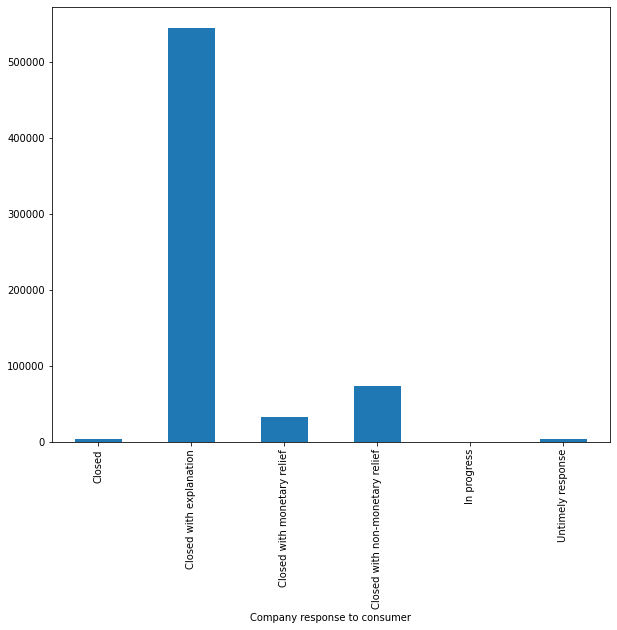

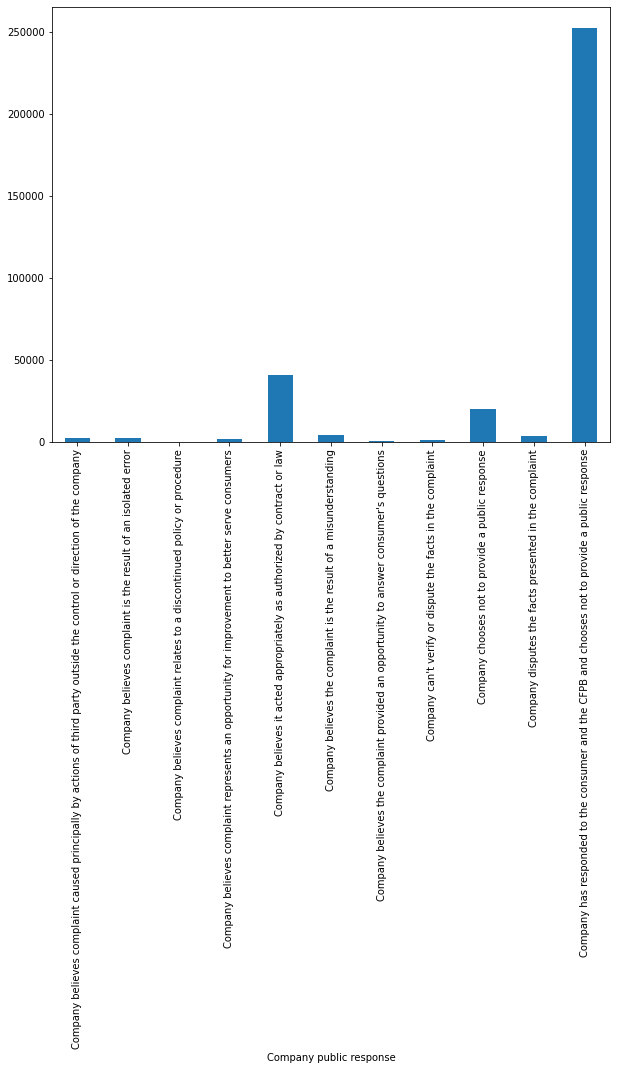

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

fig = plt.figure(figsize=(10,8))
df.groupby('State').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

fig = plt.figure(figsize=(10,8))
df.groupby('Company response to consumer').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

fig = plt.figure(figsize=(10,8))
df.groupby('Company public response').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [ ]:
# select ten most frequent complaint issues
nm=df.groupby('Issue').Consumer_complaint_narrative.count()
#print(nm)
iss=nm.to_frame()
iss.head()
iss.sort_values("Consumer_complaint_narrative",inplace=True,ascending=False)
print(iss.head(10))
print(iss.tail(10))

                                                    Consumer_complaint_narrative
Issue                                                                           
Incorrect information on your report                                      135879
Problem with a credit reporting company's inves...                         68420
Attempts to collect debt not owed                                          40937
Improper use of your report                                                25897
Incorrect information on credit report                                     21217
Trouble during payment process                                             19010
Cont'd attempts collect debt not owed                                      17434
Written notification about debt                                            17278
Communication tactics                                                      15941
Managing an account                                                        15414
                            

In [ ]:
# select 10 maximum complaints received companies
nm=df.groupby('Company').Consumer_complaint_narrative.count()
#print(nm)
sd=nm.to_frame()
sd.head()
sd.sort_values("Consumer_complaint_narrative",inplace=True,ascending=False)
print(sd.head(10))
print(sd.tail(10))

                                        Consumer_complaint_narrative
Company                                                             
EQUIFAX, INC.                                                  75776
Experian Information Solutions Inc.                            72847
TRANSUNION INTERMEDIATE HOLDINGS, INC.                         69665
CITIBANK, N.A.                                                 20751
BANK OF AMERICA, NATIONAL ASSOCIATION                          19651
JPMORGAN CHASE & CO.                                           19646
WELLS FARGO & COMPANY                                          19477
CAPITAL ONE FINANCIAL CORPORATION                              17823
Navient Solutions, LLC.                                        15448
SYNCHRONY FINANCIAL                                            11449
                                    Consumer_complaint_narrative
Company                                                         
SVI Group Inc.                            

## Basic Descriptives for Narratives
- There's a lot of other interesting stuff we can explore, but the language stuff is probably what is most interesting. 
- `Consumer complaint narrative`

In [ ]:
# broad view of stop words
nltk.download('stopwords')

stop=set(stopwords.words('english'))
# to list
corpus=[]
df=df['Consumer_complaint_narrative'].str.split()
dflist=df.values.tolist()

corpus=[word for i in df for word in i]

dic= defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
# top 10 frequent repeated stop words
ns=sorted(dic.items(), key=lambda item:item[1],reverse=True)
ns[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('the', 4706198),
 ('to', 4104065),
 ('and', 3300167),
 ('a', 2384106),
 ('my', 2374481),
 ('of', 2126090),
 ('that', 1859329),
 ('was', 1554614),
 ('in', 1302443),
 ('on', 1280442)]

In [ ]:
dic= defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word]+=1
# top 20 frequent repeated content words
ns=sorted(dic.items(), key=lambda item:item[1],reverse=True)
ns[:20]

[('XXXX', 4854286),
 ('I', 4292891),
 ('credit', 897506),
 ('account', 624601),
 ('(', 616209),
 (')', 507717),
 ('XXXX,', 494421),
 ('XX/XX/XXXX', 449927),
 ('The', 409461),
 ('would', 397472),
 ('information', 374756),
 ('XXXX.', 337569),
 ('payment', 320093),
 ('report', 311429),
 ('told', 300229),
 (':', 290994),
 ('received', 284308),
 ('loan', 271001),
 ('This', 257026),
 ('debt', 241250)]

## Value Counts

In [ ]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    623496
Debt collection                                                                 331692
Mortgage                                                                        318681
Credit reporting                                                                140432
Credit card or prepaid card                                                     100354
Credit card                                                                      89190
Bank account or service                                                          86206
Checking or savings account                                                      80781
Student loan                                                                     60375
Consumer Loan                                                                    31604
Money transfer, virtual currency, or money service                               22328
Vehicle loan or lease                      

In [ ]:
df['Submitted via'].value_counts()

Web            1520495
Referral        205849
Phone           108406
Postal mail      79318
Fax              24673
Email              423
Name: Submitted via, dtype: int64

In [ ]:
df['Sub-product'].value_counts()

Credit reporting                              615419
Checking account                              120898
Other mortgage                                 86635
General-purpose credit card or charge card     75252
Conventional fixed mortgage                    70613
                                               ...  
Credit repair                                    103
Traveler’s/Cashier’s checks                       88
Transit card                                      37
Student prepaid card                              14
Electronic Benefit Transfer / EBT card            12
Name: Sub-product, Length: 76, dtype: int64

In [ ]:
df['Issue'].value_counts()

Incorrect information on your report                                                406362
Problem with a credit reporting company's investigation into an existing problem    146826
Loan modification,collection,foreclosure                                            112309
Incorrect information on credit report                                              102686
Attempts to collect debt not owed                                                    87639
                                                                                     ...  
Property was sold                                                                        7
Lender sold the property                                                                 7
Property was damaged or destroyed property                                               6
Problem with an overdraft                                                                5
Lender damaged or destroyed property                                                     3

In [ ]:
df['Sub-issue'].value_counts()

Information belongs to someone else                                                 251514
Their investigation did not fix an error on your report                              87165
Account status incorrect                                                             52523
Account information incorrect                                                        48375
Debt is not yours                                                                    44804
                                                                                     ...  
Incorrect information on your report                                                    12
Qualified for a better loan than the one offered                                        11
Insurance terms                                                                          6
Was signed up for overdraft on card, but don't want to be                                3
Problem with a credit reporting company's investigation into an existing problem         1

In [ ]:
df['Company'].value_counts()

EQUIFAX, INC.                             227569
Experian Information Solutions Inc.       221541
TRANSUNION INTERMEDIATE HOLDINGS, INC.    218046
BANK OF AMERICA, NATIONAL ASSOCIATION      97453
WELLS FARGO & COMPANY                      83499
                                           ...  
Mortgage Lending Masters, LLC                  1
Wedgewood, LLC                                 1
MCI Mortgage Inc                               1
Trinity Enterprises Partners, LLC              1
Great Northern Mortgage Corp.                  1
Name: Company, Length: 5882, dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['Date received']) 

In [ ]:
df['date']

0         2021-01-13
1         2019-09-24
2         2019-09-19
3         2019-11-08
4         2019-09-15
             ...    
1939159   2016-07-11
1939160   2017-01-24
1939161   2015-03-26
1939162   2015-12-12
1939163   2016-08-09
Name: date, Length: 1939164, dtype: datetime64[ns]

In [ ]:
df['Tags'].value_counts()

Servicemember                    130952
Older American                    97145
Older American, Servicemember     20674
Name: Tags, dtype: int64

# API Option

In [ ]:
import requests
import json

In [ ]:
r1 = requests.get('https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/')

In [ ]:
print(json.dumps(r1.json(), indent=2))

{
  "_scroll_id": "cXVlcnlUaGVuRmV0Y2g7NTszODM5MDI6dFBLRnhWUDBSMi1VVXBrSVctbFk1ZzszODM3MjE6ejVfQk1TZWVRbGk2WUhYcm9TSlBCUTsyNTU2Njk6WElPYW10c1FUeENvZjVJM21UTUdrUTsyNTU2NzA6WElPYW10c1FUeENvZjVJM21UTUdrUTszODM3MjI6ejVfQk1TZWVRbGk2WUhYcm9TSlBCUTswOw==",
  "took": 676,
  "timed_out": false,
  "_shards": {
    "total": 5,
    "successful": 5,
    "failed": 0
  },
  "hits": {
    "total": 1943816,
    "max_score": 1.0,
    "hits": [
      {
        "_index": "complaint-public-v1",
        "_type": "complaint",
        "_id": "3319021",
        "_score": 1.0,
        "_source": {
          "tags": null,
          "zip_code": "75080",
          "complaint_id": "3319021",
          "issue": "Written notification about debt",
          "date_received": "2019-07-26T12:00:00-05:00",
          "state": "TX",
          "consumer_disputed": "N/A",
          "product": "Debt collection",
          "has_narrative": false,
          "company_response": "Closed with explanation",
          "company": "POR

In [ ]:
json = r1.json()

In [ ]:
json.keys()

dict_keys(['_scroll_id', 'took', 'timed_out', '_shards', 'hits', 'aggregations', '_meta'])

### Summary Statistics 

- **This looks helpful**

In [ ]:
json['aggregations']

{'company_public_response': {'company_public_response': {'buckets': [{'doc_count': 644662,
     'key': 'Company has responded to the consumer and the CFPB and chooses not to provide a public response'},
    {'doc_count': 84480,
     'key': 'Company believes it acted appropriately as authorized by contract or law'},
    {'doc_count': 52473,
     'key': 'Company chooses not to provide a public response'},
    {'doc_count': 7766,
     'key': 'Company believes the complaint is the result of a misunderstanding'},
    {'doc_count': 6843,
     'key': 'Company disputes the facts presented in the complaint'},
    {'doc_count': 4796,
     'key': 'Company believes complaint caused principally by actions of third party outside the control or direction of the company'},
    {'doc_count': 4754,
     'key': 'Company believes complaint is the result of an isolated error'},
    {'doc_count': 3444,
     'key': 'Company believes complaint represents an opportunity for improvement to better serve consumer

In [ ]:
json['hits'] #example of each entry

{'hits': [{'_id': '3307472',
   '_index': 'complaint-public-v1',
   '_score': 1.0,
   '_source': {'company': 'Experian Information Solutions Inc.',
    'company_public_response': 'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
    'company_response': 'Closed with non-monetary relief',
    'complaint_id': '3307472',
    'complaint_what_happened': '',
    'consumer_consent_provided': 'Consent not provided',
    'consumer_disputed': 'N/A',
    'date_received': '2019-07-16T12:00:00-05:00',
    'date_sent_to_company': '2019-07-16T12:00:00-05:00',
    'has_narrative': False,
    'issue': 'Incorrect information on your report',
    'product': 'Credit reporting, credit repair services, or other personal consumer reports',
    'state': 'NY',
    'sub_issue': 'Information belongs to someone else',
    'sub_product': 'Credit reporting',
    'submitted_via': 'Web',
    'tags': None,
    'timely': 'Yes',
    'zip_code': '11208'},
   '_type': 'compl